<h1>프로젝트 개발환경</h1>

<h2>라이브러리 설치</h2>

- Pandas 
    - https://pandas.pydata.org/
  
- scikit-learn
    - http://scikit-learn.org/
  
- Numpy
    - https://www.lfd.uci.edu/~gohlke/pythonlibs/#numpy
- Matplotlib
    - 	 https://sourceforge.net/projects/matplotlib/files/matplotlib/matplotlib-1.5.0/windows/
- Seaborn
    - 아나콘다를 다운받았을 경우 pip install seaborn
    - 맥은 그냥 pip install seaborn 하면 된다.



<h1>프로젝트 실행 방법</h1>

- 위에 있는 라이브러리들을 다 설치하였다면, jupyter notebook 을 통해 프로젝트 파일을 엽니다. 
- 이후 jupyter notebook 으로 한줄씩 실행시키면 됩니다.
- 단 압축 시켜놓은 파일들이 한 폴더 내에 있어야 합니다. 


<h1>코드해석 및 프로젝트 설명</h1>

In [1]:
!curl https://topcs.blob.core.windows.net/public/FlightData.csv -o flightdata.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1552k  100 1552k    0     0  1706k      0 --:--:-- --:--:-- --:--:-- 1712k


<u><strong>먼저 우리가 원하는 데이터들이 모여있는 flightdata.csv 파일을 csv 파일이나 엑셀 파일 등을 쉽게 분석할 수 있는 pandas 라이브러리를 통해 열고 이를 통해 우리가 데이터를 사용하기 쉽게 데이터를 필터링 합니다.</strong></u>

In [3]:
#panda 라이브러리를 활용하여 비행기에 대한 데이터가 있는 csv파일을 분석

import pandas as pd

df = pd.read_csv('flightdata.csv')
df.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
0,2016,1,1,1,5,DL,N836DN,1399,10397,ATL,...,2143,2102.0,-41.0,0.0,0.0,0.0,338.0,295.0,2182.0,NaN
1,2016,1,1,1,5,DL,N964DN,1476,11433,DTW,...,1435,1439.0,4.0,0.0,0.0,0.0,110.0,115.0,528.0,NaN
2,2016,1,1,1,5,DL,N813DN,1597,10397,ATL,...,1215,1142.0,-33.0,0.0,0.0,0.0,335.0,300.0,2182.0,NaN
3,2016,1,1,1,5,DL,N587NW,1768,14747,SEA,...,1335,1345.0,10.0,0.0,0.0,0.0,196.0,205.0,1399.0,NaN
4,2016,1,1,1,5,DL,N836DN,1823,14747,SEA,...,607,615.0,8.0,0.0,0.0,0.0,247.0,259.0,1927.0,NaN


<u><strong>아래부터는 우리 데이터 중 아무런 값도 없는 열을 찾아 삭제하는 것입니다. 아래에 보시면 isnull().sum()을 이용하여 각 열마다 null값 즉 아무 값도 들어있지 않은 값들의 갯수의 합을 구하고 그 결과 총 11231 우리의 행의 값과 같은 값이 나오면 결국 모든 값이 null인 것이므로 찾아서 삭제해 줍니다</strong></u>

In [4]:
#csv파일에 행과 열이 얼마나 있는지 분석


df.shape

(11231, 26)

In [5]:
#아무것도 없는 데이터가 있는지 확인


df.isnull().values.any()

True

In [6]:
#아무것도 없는 데이터들의 개수를 열단위로 파악


df.isnull().sum()

YEAR                       0
QUARTER                    0
MONTH                      0
DAY_OF_MONTH               0
DAY_OF_WEEK                0
UNIQUE_CARRIER             0
TAIL_NUM                   0
FL_NUM                     0
ORIGIN_AIRPORT_ID          0
ORIGIN                     0
DEST_AIRPORT_ID            0
DEST                       0
CRS_DEP_TIME               0
DEP_TIME                 107
DEP_DELAY                107
DEP_DEL15                107
CRS_ARR_TIME               0
ARR_TIME                 115
ARR_DELAY                188
ARR_DEL15                188
CANCELLED                  0
DIVERTED                   0
CRS_ELAPSED_TIME           0
ACTUAL_ELAPSED_TIME      188
DISTANCE                   0
Unnamed: 25            11231
dtype: int64

In [7]:
#우리 데이터의 행이 11231 개인데 여기서 null의 값이
#11231이 나온 행은 모든 데이터가 비어있는 경우이기에 이 열을 삭제


df = df.drop('Unnamed: 25', axis=1)
df.isnull().sum()

YEAR                     0
QUARTER                  0
MONTH                    0
DAY_OF_MONTH             0
DAY_OF_WEEK              0
UNIQUE_CARRIER           0
TAIL_NUM                 0
FL_NUM                   0
ORIGIN_AIRPORT_ID        0
ORIGIN                   0
DEST_AIRPORT_ID          0
DEST                     0
CRS_DEP_TIME             0
DEP_TIME               107
DEP_DELAY              107
DEP_DEL15              107
CRS_ARR_TIME             0
ARR_TIME               115
ARR_DELAY              188
ARR_DEL15              188
CANCELLED                0
DIVERTED                 0
CRS_ELAPSED_TIME         0
ACTUAL_ELAPSED_TIME    188
DISTANCE                 0
dtype: int64

<u><strong>먼저 이제 machine learning 을 하기 위해 원하는 값들만 저장합니다. 이후 마찬가지로 다시 null 값을 확인하고 있습니다. 여기서 ARR_DEL15 부분에서 null 값이 나옵니다. 다시 확인하여 보니 비행기가 아예 결항된 경우 이 데이터에서는 null로 처리하였습니다. 따라서 결항 조차 결국 비행기가 지연된 것과 같으므로 우리는 이 값에다 1(비행기 지연을 뜻함)을 넣어줍니다.</strong></u>

In [8]:
#원하는 데이터만을 사용하기위해 데이터를 필터링 함 


df = df[["MONTH", "DAY_OF_MONTH", "DAY_OF_WEEK", "ORIGIN", "DEST", "CRS_DEP_TIME", "ARR_DEL15"]]
df.isnull().sum()

MONTH             0
DAY_OF_MONTH      0
DAY_OF_WEEK       0
ORIGIN            0
DEST              0
CRS_DEP_TIME      0
ARR_DEL15       188
dtype: int64

In [9]:
# 다시 필터링 한 데이터 중 null 값이 있는지 확인


df[df.isnull().values.any(axis=1)].head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_DEP_TIME,ARR_DEL15
177,1,9,6,MSP,SEA,701,NaN
179,1,10,7,MSP,DTW,1348,NaN
184,1,10,7,MSP,DTW,625,NaN
210,1,10,7,DTW,MSP,1200,NaN
478,1,22,5,SEA,JFK,2305,NaN


In [10]:
#null 로 되어있는 값은 비행기가 취소되어있는 경우이므로 우리는 이를 delay로 처리해야함


df = df.fillna({'ARR_DEL15': 1})
df.iloc[177:185]

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_DEP_TIME,ARR_DEL15
177,1,9,6,MSP,SEA,701,1.0
178,1,9,6,DTW,JFK,1527,0.0
179,1,10,7,MSP,DTW,1348,1.0
180,1,10,7,DTW,MSP,1540,0.0
181,1,10,7,JFK,ATL,1325,0.0
182,1,10,7,JFK,ATL,610,0.0
183,1,10,7,JFK,SEA,1615,0.0
184,1,10,7,MSP,DTW,625,1.0


In [12]:
#data 들을 다시한번 확인
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_DEP_TIME,ARR_DEL15
0,1,1,5,ATL,SEA,1905,0.0
1,1,1,5,DTW,MSP,1345,0.0
2,1,1,5,ATL,SEA,940,0.0
3,1,1,5,SEA,MSP,819,0.0
4,1,1,5,SEA,DTW,2300,0.0


<u><strong>주어진 데이터를 훈련시킬 때, 비행기의 모든 출발시간이 분단위로 되어있다면, 컴퓨터가 고려해야할 부분이 너무 크므로, floor(내림) 처리를 하여 모든 분단위를 제거하고 시간 단위로 바꿔줍니다. </strong></u>

In [14]:
#계산을 편하게 하기위해 분단위는 제거함


import math

for index, row in df.iterrows():
    df.loc[index, 'CRS_DEP_TIME'] = math.floor(row['CRS_DEP_TIME'] / 100)
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_DEP_TIME,ARR_DEL15
0,1,1,5,ATL,SEA,19,0.0
1,1,1,5,DTW,MSP,13,0.0
2,1,1,5,ATL,SEA,9,0.0
3,1,1,5,SEA,MSP,8,0.0
4,1,1,5,SEA,DTW,23,0.0


In [15]:
#우리는 출발지와 도착지에 대한 data를 수학적으로 예측하기 위해 출발, 도착 공항들마다 새로운 행을 만들어 0과 1을 넣어줘야 한다 
#여기서 1은 비행기가 떠났다는 것이고 0은 반대 경우이다.
df = pd.get_dummies(df, columns=['ORIGIN', 'DEST'])
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CRS_DEP_TIME,ARR_DEL15,ORIGIN_ATL,ORIGIN_DTW,ORIGIN_JFK,ORIGIN_MSP,ORIGIN_SEA,DEST_ATL,DEST_DTW,DEST_JFK,DEST_MSP,DEST_SEA
0,1,1,5,19,0.0,1,0,0,0,0,0,0,0,0,1
1,1,1,5,13,0.0,0,1,0,0,0,0,0,0,1,0
2,1,1,5,9,0.0,1,0,0,0,0,0,0,0,0,1
3,1,1,5,8,0.0,0,0,0,0,1,0,0,0,1,0
4,1,1,5,23,0.0,0,0,0,0,1,0,1,0,0,0


<img src="./1.png" width = 300, height = 300>

<u><strong>우리는 Random Forest 방법을 사용하여 만든 모델을 학습시킬 것입니다. 먼저 Random Forest를 알기 위해선 결정트리 방법을 알아야 합니다. 결정트리는 우리가 데이터 구조 시간에 다뤘던 트리 구조처럼 생겼고, 마치 스무고개를 하듯이 각각의 단계마다 true 또는 false 로 구분을 해주는 질문을 통해 다음 층의 노드로 옮겨가며 기계를 학습시키는 방법입니다.</strong></u>

<img src="./2.png" width = 300, height = 300>

<u><strong>Random Forest는 이 결정트리들을 이용하여 훈련시키는 방법입니다. 즉 먼저 여러개의 결정트리를 만들고, 어떠한 데이터를 예측할 때 만들어 놓은 여러개의 결정 트리들 중 가장 많은 결정 트리가 결정한거에 따라 예측을 결정하는 방법입니다. 예를들어 인간으로 따지면 1명이 수학문제를 푸는 것보다, 100명이 한 수학문제를 풀 때 더 잘푸는 것과 비슷합니다.</strong></u>

<img src="./3.png" width = 300, height = 300>

<u><strong>이제 데이터들이 잘 피터링 되어있으니 먼저 모델을 만든 뒤 데이터들을 통해 모델을 교육시키고, 예측이 올바른지 평가해 볼 것입니다. 저희는 주어진 데이터가 많지 않기 때문에 전체 데이터의 80%를 학습하는 데에 사용할 것이고, 나머지 20%는 예측에 대한 평가를 할 예정입니다. machine learning을 하기 위해선 scikit-leran 라이브러리를 선언하고 사용할 것입니다. 먼저 데이터들을 앞에서 말했던 것처럼 교육시킬 데이터와, 평가할 데이터로 나누고 잘 나누어져 있는지 확인합니다.</strong></u>

In [16]:
#우리는 데이터가 많지 않기때문에 주어진 데이터를 활용하여 학습, 평가 과정을 가질 것이다
#학습하는 데이터는 전체 데이터의 80%를 사용할 것이고, 나머지 20%로 예측에 대한 평가를 할 것이다.
#본격적으로 machine learning 을 하기위해 sklearn 라이브러리를 선언하고, 이를 사용하여 학습 데이터와, 평가 데이터를 나눈다.

#Importing the train_test_split function from the Scikit-learn.
from sklearn.model_selection import train_test_split
#We can understand the train_test_split function as: (resource, label, split size (0.2 == 20%), a random state to select random values to split)
#Why random values? I guess it would be nicier to get the test values from all over the dataframe and not only from the beggining or the end.
#Note that our resource is df.drop the label value. Its just like "we want to find our delay, so our resource is everything EXCEPT the delay"
#And the label row is our delay, the thing we want to predict.
train_x, test_x, train_y, test_y = train_test_split(df.drop('ARR_DEL15', axis=1), df['ARR_DEL15'], test_size=0.2, random_state=42)

In [17]:
#데이터들이 잘 나누어 졌는지 확인한다. 


train_x.shape

(8984, 14)

In [18]:
test_x.shape

(2247, 14)

In [20]:
train_y.shape

(8984,)

In [21]:
test_y.shape

(2247,)

In [22]:
train_x.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CRS_DEP_TIME,ORIGIN_ATL,ORIGIN_DTW,ORIGIN_JFK,ORIGIN_MSP,ORIGIN_SEA,DEST_ATL,DEST_DTW,DEST_JFK,DEST_MSP,DEST_SEA
10303,11,3,4,20,0,1,0,0,0,0,0,0,1,0
6037,7,23,6,11,0,0,0,0,1,0,0,1,0,0
1315,2,19,5,7,1,0,0,0,0,0,1,0,0,0
9661,11,13,7,17,0,1,0,0,0,1,0,0,0,0
10594,12,10,6,5,0,0,0,1,0,1,0,0,0,0


In [23]:
test_x.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CRS_DEP_TIME,ORIGIN_ATL,ORIGIN_DTW,ORIGIN_JFK,ORIGIN_MSP,ORIGIN_SEA,DEST_ATL,DEST_DTW,DEST_JFK,DEST_MSP,DEST_SEA
10347,12,1,4,19,0,0,0,1,0,1,0,0,0,0
2199,3,21,1,8,0,0,1,0,0,0,0,0,1,0
9704,11,10,4,18,0,1,0,0,0,0,0,0,1,0
1662,3,1,2,16,0,1,0,0,0,1,0,0,0,0
7364,8,28,7,7,1,0,0,0,0,0,0,0,0,1


In [24]:
train_y.head()

10303    0.0
6037     0.0
1315     0.0
9661     0.0
10594    0.0
Name: ARR_DEL15, dtype: float64

In [25]:
test_y.head()

10347    0.0
2199     0.0
9704     0.0
1662     0.0
7364     0.0
Name: ARR_DEL15, dtype: float64

<strong><u>이제 데이터들을 잘 나누었으니, RandomForestClassifier 함수를 통해 기계 학습을 시작할 것입니다. </u></strong>

In [26]:
#이제 RandomForestClassifier 를 통해 13층의 목적나무로 data를 train 시킨다.


from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=13)
model.fit(train_x, train_y)


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=13, verbose=0, warm_start=False)

<u><strong>이제부터는 우리가 학습시킨 모델을 평가하는 부분입니다.</strong></u>

In [27]:
# 이제 교육시킨 model을 test데이터를 통해 예측이 얼마나 나오는지 평가한다


predicted = model.predict(test_x)
model.score(test_x, test_y)

0.8602581219403649

In [28]:
#86 퍼센트가 나왔지만 사실 더 높은 정확도가 필요하기 때문에 ROC AUC 점수를 알아 볼 것이다.
from sklearn.metrics import roc_auc_score
probabilities = model.predict_proba(test_x)


In [29]:
#ROC AUC 점수를 내는 코드
roc_auc_score(test_y, probabilities[:, 1])

0.6743824904998539

In [30]:
#당연히 우리의 데이터의 경우 연착될 확률 보다 정상 운행할 확률이 훨씬 높기 때문에 67퍼센트라는 안좋은 점수가 roc auc 점수에서는 나타난다. 
#우리의 예측이 얼마나 틀렸는지 알기 위해 confusion matrix를 적용해본다 
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y, predicted)

array([[1882,   54],
       [ 260,   51]])

<img src="./4.png" width = 300, height = 300>

<strong><u>Confusion Matrix는 정확도와 재현율, 예측 등 알고리즘 및 Machine Learning 모델의 성능을 평가하는 지표로 많이 사용되고, Confusion Matrix는 학습을 통한 예측 성능을 측정하기 위해 예측 값과 실제 값을 비교하기 위한 표를 말합니다. 아래와 같은 지표들로 값이 평가됩니다.</u></strong>

<img src="./5.png" width = 400, height = 400>

In [32]:
# [1882, 54]는 비행기가 정상 운행할 때이다. 따라서 1882는 정상운행을 맞췄을 때, 54는 정상운행이라고 예측했지만 틀렸을 때이다
# 마찬가지로 [260, 51]은 비행기가 지연되었을 경우이다. 260은 비행기가 지연된 것을 맞추었을때, 51은 지연되었다고 예측했지만 그것이 틀렸을떄 이다. 
# confusion matrix를 적용하고 다시 적용 시켜본다.
from sklearn.metrics import precision_score

train_predictions = model.predict(train_x)
precision_score(train_y, train_predictions)

0.9972375690607734

In [33]:
# scikit-learn 으로 측정한 점수에서 우리는 99.7%의 정확도를 얻었다. 
from sklearn.metrics import recall_score

recall_score(train_y, train_predictions)

0.8650159744408946

In [34]:
#이제 우리의 결과들을 보여주기위해 pyplot 과 seaborn을 import 해준다.
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [1]:
# test 한 데이터를 분석하기 위해 데이터로 roc 그래프를 그린다
# roc 그래프는 우리가 예측한 데이터에 대해 True Positive Rate 와 False Poistive Rate를 
# 각각 y축 x축으로 사용하여 그린 그래프이다. roc 면적이 1이면 100%의 정확도인 것이고, 0.5이면 0퍼센트의 정확도인 것이다. 
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(test_y, probabilities[:, 1])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

NameError: name 'test_y' is not defined

In [38]:
#우리가 직접 예측을 해보는 함수 구현
def predict_delay(departure_date_time, origin, destination):
    #Here we import some functions to deal with date and time.
    from datetime import datetime

    #출발, 날짜, 시간 데이터 들로부터 정보를 얻음.
    try:
        departure_date_time_parsed = datetime.strptime(departure_date_time, '%d/%m/%Y %H:%M:%S')
    except ValueError as e:
        return 'Error parsing date/time - {}'.format(e)

    #이제 변수들을 각각의 달, 일 등 각각의 요소로 쪼개기
    month = departure_date_time_parsed.month
    day = departure_date_time_parsed.day
    day_of_week = departure_date_time_parsed.isoweekday()
    hour = departure_date_time_parsed.hour

    #출발지와 목적지들을 모두 대문자로 바꿔줌
    origin = origin.upper()
    destination = destination.upper()

    #이제 얻은 데이터들을 우리의 모델에 적용시켜 예측함
    input = [{'MONTH': month,
              'DAY': day,
              'DAY_OF_WEEK': day_of_week,
              'CRS_DEP_TIME': hour,
              'ORIGIN_ATL': 1 if origin == 'ATL' else 0,
              'ORIGIN_DTW': 1 if origin == 'DTW' else 0,
              'ORIGIN_JFK': 1 if origin == 'JFK' else 0,
              'ORIGIN_MSP': 1 if origin == 'MSP' else 0,
              'ORIGIN_SEA': 1 if origin == 'SEA' else 0,
              'DEST_ATL': 1 if destination == 'ATL' else 0,
              'DEST_DTW': 1 if destination == 'DTW' else 0,
              'DEST_JFK': 1 if destination == 'JFK' else 0,
              'DEST_MSP': 1 if destination == 'MSP' else 0,
              'DEST_SEA': 1 if destination == 'SEA' else 0 }]

    #우리가 예측한 내용 즉 비행기가 지연될 확률을 리턴해줌.
    return model.predict_proba(pd.DataFrame(input))[0][0]

In [39]:
#테스트 1
predict_delay('1/10/2018 21:45:00', 'JFK', 'ATL')

0.6

In [40]:
#60% 확률로 지연된다는 결과를 얻음
#테스트 2
predict_delay('2/10/2018 21:45:00', 'JFK', 'ATL')

0.8

In [41]:
#테스트3
predict_delay('2/10/2018 10:00:00', 'ATL', 'SEA')

1.0

(0.0, 1.0)

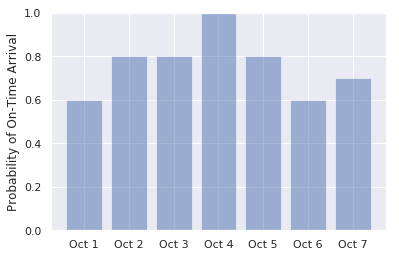

In [42]:
#이제 우리가 예측한 데이터들을 다시 그래프로 그려보는 과정
import numpy as np

#각각의 날을 labels의 저장
labels = ('Oct 1', 'Oct 2', 'Oct 3', 'Oct 4', 'Oct 5', 'Oct 6', 'Oct 7')

#몇 % 확률로 지연되는지 values 에 저장
values = (predict_delay('1/10/2018 21:45:00', 'JFK', 'ATL'),
          predict_delay('2/10/2018 21:45:00', 'JFK', 'ATL'),
          predict_delay('3/10/2018 21:45:00', 'JFK', 'ATL'),
          predict_delay('4/10/2018 21:45:00', 'JFK', 'ATL'),
          predict_delay('5/10/2018 21:45:00', 'JFK', 'ATL'),
          predict_delay('6/10/2018 21:45:00', 'JFK', 'ATL'),
          predict_delay('7/10/2018 21:45:00', 'JFK', 'ATL'))

alabels = np.arange(len(labels))

#이제 예측한 값에 따라 그래프를 그린다
plt.bar(alabels, values, align='center', alpha=0.5)

plt.xticks(alabels, labels)

plt.ylabel('Probability of On-Time Arrival')

plt.ylim((0.0, 1.0))

(0.0, 1.0)

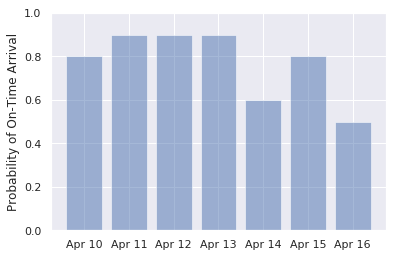

In [43]:
#위의 테스트처럼 한번더 테스트를 해봄
import numpy as np

labels = ('Apr 10', 'Apr 11', 'Apr 12', 'Apr 13', 'Apr 14', 'Apr 15', 'Apr 16')
values = (predict_delay('10/4/2018 21:45:00', 'JFK', 'MSP'),
          predict_delay('11/4/2018 21:45:00', 'JFK', 'MSP'),
          predict_delay('12/4/2018 21:45:00', 'JFK', 'MSP'),
          predict_delay('13/4/2018 21:45:00', 'JFK', 'MSP'),
          predict_delay('14/4/2018 21:45:00', 'JFK', 'MSP'),
          predict_delay('15/4/2018 21:45:00', 'JFK', 'MSP'),
          predict_delay('15/4/2018 21:45:00', 'JFK', 'MSP'))
alabels = np.arange(len(labels))

plt.bar(alabels, values, align='center', alpha=0.5)
plt.xticks(alabels, labels)
plt.ylabel('Probability of On-Time Arrival')
plt.ylim((0.0, 1.0))


(0.0, 1.0)

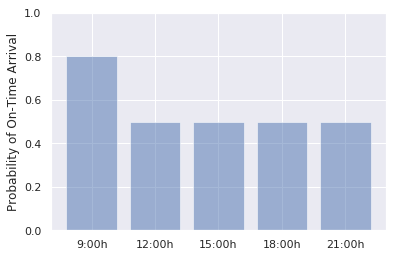

In [45]:
#테스트 3

import numpy as np

labels = ('9:00h', '12:00h', '15:00h', '18:00h', '21:00h')
values = (predict_delay('30/1/2018 09:00:00', 'SEA', 'ATL'),
          predict_delay('30/1/2018 12:00:00', 'SEA', 'ATL'),
          predict_delay('30/1/2018 15:00:00', 'SEA', 'ATL'),
          predict_delay('30/1/2018 18:00:00', 'SEA', 'ATL'),
          predict_delay('30/1/2018 21:00:00', 'SEA', 'ATL'))
alabels = np.arange(len(labels))

plt.bar(alabels, values, align='center', alpha=0.5)
plt.xticks(alabels, labels)
plt.ylabel('Probability of On-Time Arrival')
plt.ylim((0.0, 1.0))
